# Tutorial 32: Relaxed Risk Parity Portfolio Optimization

**Relaxed Risk Parity Portfolio Optimization**(완화된 리스크 균형 포트폴리오 최적화)은 전통적인 리스크 균형(Risk Parity) 접근 방식을 확장하여 특정 조건이나 제한을 추가로 고려하는 포트폴리오 최적화 방법입니다. 이 접근 방식은 투자자의 목표와 제한 사항을 더 잘 반영할 수 있도록 합니다. 자세히 설명하겠습니다.

### 기본 개념

**리스크 균형 (Risk Parity)**:
- 리스크 균형 포트폴리오는 각 자산이 포트폴리오의 전체 리스크에 동일하게 기여하도록 설계된 포트폴리오입니다.
- 이는 일반적으로 각 자산의 표준편차와 상관관계를 기반으로 가중치를 조정합니다.
- 전통적인 리스크 균형 접근 방식은 다음과 같은 수식으로 정의됩니다:
  $$
  w_i = \frac{\frac{1}{\sigma_i}}{\sum_{j=1}^{n} \frac{1}{\sigma_j}}
  $$
  여기서 $ w_i $는 자산 $ i $의 가중치, $ \sigma_i $는 자산 $ i $의 표준편차입니다.

**완화된 리스크 균형 (Relaxed Risk Parity)**:
- 완화된 리스크 균형 접근 방식은 리스크 균형 모델을 확장하여 특정 조건이나 제한을 추가로 고려합니다.
- 이 방법은 특정 자산이나 자산 그룹의 가중치에 상한선이나 하한선을 설정할 수 있습니다.
- 또한, 특정 자산이나 자산 그룹에 대해 다른 리스크 기여도를 설정할 수 있습니다.
- 이는 투자자의 목표와 제한 사항을 더 잘 반영하여 포트폴리오를 최적화할 수 있게 합니다.

### 수학적 모델

완화된 리스크 균형 모델은 다음과 같은 형태로 표현될 수 있습니다:

1. **목표 함수 (Objective Function)**:
   $$
   \min \sum_{i=1}^{n} \left( w_i \cdot \sigma_i - k \right)^2
   $$
   여기서 $ w_i $는 자산 $ i $의 가중치, $ \sigma_i $는 자산 $ i $의 표준편차, $ k $는 목표 리스크 기여도입니다.

2. **제약 조건 (Constraints)**:
   - 가중치의 합은 1이어야 합니다:
     $$
     \sum_{i=1}^{n} w_i = 1
     $$
   - 가중치는 상한선과 하한선을 가질 수 있습니다:
     $$
     l_i \leq w_i \leq u_i
     $$
     여기서 $ l_i $와 $ u_i $는 자산 $ i $의 가중치의 하한선과 상한선입니다.
   - 특정 자산 그룹에 대해 다른 리스크 기여도를 설정할 수 있습니다.

### 예제 코드

아래는 `riskfolio` 라이브러리를 사용하여 완화된 리스크 균형 포트폴리오를 최적화하는 예제 코드입니다.

```python
import numpy as np
import pandas as pd
import riskfolio as rp

# 예시 데이터 생성
np.random.seed(42)
Y = np.random.randn(100, 10)  # 100개의 샘플과 10개의 자산
asset_names = [f'Asset {i}' for i in range(1, 11)]
returns = pd.DataFrame(Y, columns=asset_names)

# 포트폴리오 객체 생성
port = rp.Portfolio(returns=returns)

# 기대 수익률과 공분산 행렬 계산
method_mu = 'hist'
method_cov = 'hist'
port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# 완화된 리스크 균형 포트폴리오 최적화
model = 'HERC'  # Hierarchical Equal Risk Contribution
codependence = 'pearson'
obj = 'ERC'  # 목표 함수: Equal Risk Contribution
rm = 'MV'  # 위험 측정치: Mean-Variance
rf = 0  # 무위험 이자율
l = 0  # 위험 회피 계수 (유틸리티 함수에서만 사용)
upperlng = 0.3  # 롱 포지션의 상한선
uppersht = 0.1  # 숏 포지션의 상한선

# 제약 조건 설정
port.upperlng = upperlng
port.uppersht = uppersht

# 최적 포트폴리오 계산
w = port.optimization(model=model,
                      codependence=codependence,
                      method_cov=method_cov,
                      obj=obj,
                      rm=rm,
                      rf=rf,
                      l=l)

# 결과 출력
print("Optimal weights:\n", w.T)
```

### 코드 설명

1. **데이터 생성**: 예시 데이터를 생성하고 자산 이름을 설정합니다.
2. **포트폴리오 객체 생성**: `Portfolio` 객체를 생성하고 자산의 기대 수익률과 공분산 행렬을 계산합니다.
3. **제약 조건 설정**: 롱 포지션과 숏 포지션의 상한선을 설정합니다.
4. **최적화 매개변수 설정**: 모델을 `HERC`로 설정하고, 목표 함수로 `ERC`를 선택합니다.
5. **최적 포트폴리오 계산**: `optimization` 메서드를 사용하여 최적의 포트폴리오 가중치를 계산합니다.
6. **결과 출력**: 최적화된 포트폴리오 가중치를 출력합니다.

### 결론

완화된 리스크 균형 포트폴리오 최적화는 전통적인 리스크 균형 접근 방식을 확장하여 특정 조건이나 제한을 추가로 고려하는 방법입니다. 이를 통해 투자자의 목표와 제한 사항을 더 잘 반영할 수 있으며, 다양한 제약 조건을 고려하여 더 현실적인 포트폴리오를 구성할 수 있습니다.

## 1. Downloading the data:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Date range
start = '2016-01-01'
end = '2019-12-30'

# Tickers of assets
assets = ['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA']
assets.sort()

# Downloading data
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  25 of 25 completed


In [2]:
# Calculating returns

Y = data[assets].pct_change().dropna()

display(Y.head())

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-2.0257%,0.4057%,0.4036%,1.9693%,0.0180%,0.9305%,0.3678%,0.5783%,0.9483%,-1.1953%,...,1.5881%,0.0212%,2.8236%,0.9758%,0.6987%,1.7539%,-0.1730%,0.2410%,1.3734%,-1.0857%
2016-01-06,-11.4864%,-1.5879%,0.2411%,-1.7556%,-0.7727%,-1.2473%,-0.1736%,-1.1239%,-3.5867%,-0.9551%,...,0.5547%,0.0212%,0.1592%,-1.5646%,0.3108%,-1.0155%,-0.7653%,-3.0048%,-0.9035%,-2.9145%
2016-01-07,-5.1388%,-4.1922%,-1.6573%,-2.7700%,-1.1047%,-1.9769%,-1.2207%,-0.8856%,-4.6058%,-2.5394%,...,-2.2066%,-3.0309%,-1.0411%,-3.1557%,-1.6148%,-0.2699%,-2.2845%,-2.0570%,-0.5492%,-3.0020%
2016-01-08,0.2736%,-2.2705%,-1.6037%,-2.5425%,0.1099%,-0.2241%,0.5707%,-1.6402%,-1.7641%,-0.1649%,...,-0.1539%,-1.1366%,-0.7308%,-0.1448%,0.0895%,-3.3839%,-0.1117%,-1.1387%,-0.9719%,-1.1254%
2016-01-11,-4.3384%,0.1692%,-1.6851%,-1.0216%,0.0915%,-1.1791%,0.5674%,0.5287%,0.6616%,0.0330%,...,1.6436%,0.0000%,0.9869%,-0.1450%,1.2224%,1.4570%,0.5367%,-0.4607%,0.5800%,-1.9919%


## 2. Estimating Vanilla Risk Parity Portfolio

### 2.1 Calculating the vanilla risk parity portfolio.

In [3]:
import riskfolio as rp

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimate optimal portfolio:

model = 'Classic' # Could be Classic (historical) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w_rp.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,2.4031%,3.0789%,4.0267%,4.1195%,3.8922%,5.2037%,5.1027%,3.0419%,2.8334%,3.6086%,...,6.5392%,2.9903%,6.8692%,3.5366%,4.5883%,3.9739%,3.4290%,2.9489%,5.1895%,2.9994%


### 2.2 Plotting portfolio composition

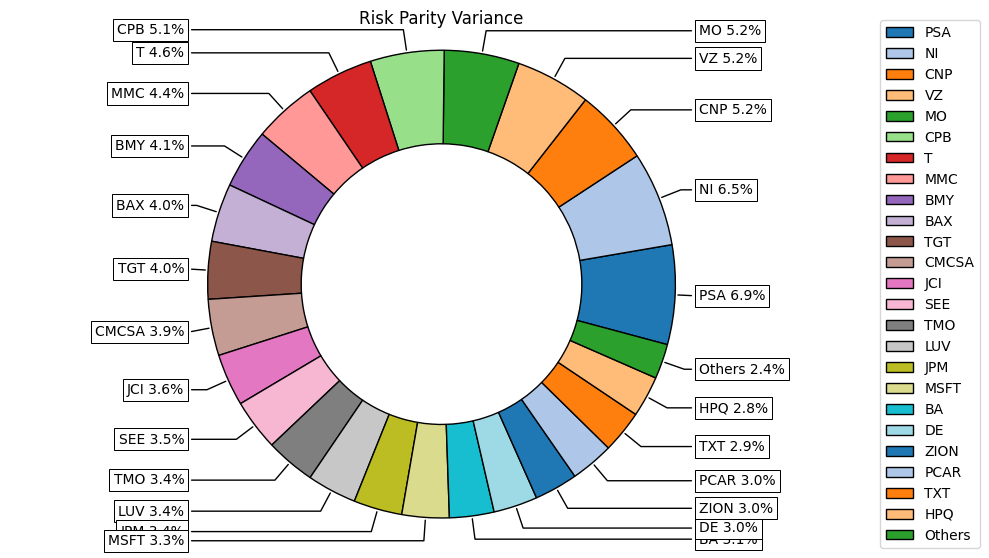

In [4]:
# Plotting the composition of the portfolio

ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 2.3 Plotting Risk Composition

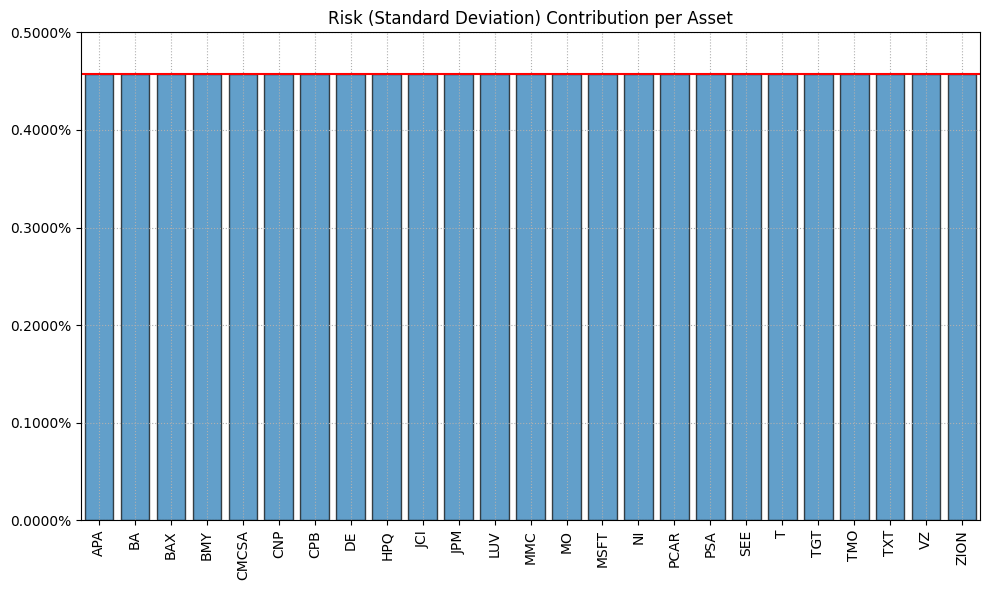

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rp,
                      cov=port.cov,
                      returns=port.returns,
                      rm=rm,
                      rf=0,
                      alpha=0.01,
                      color="tab:blue",
                      erc_line=True,
                      height=6,
                      width=10,
                      ax=ax)

plt.show()

## 3. Estimating Relaxed Risk Parity Portfolios

이 부분에서는 Gambeta와 Kwon(2020)이 제안한 완화된 리스크 균형 포트폴리오를 모델의 A, B, C 버전을 사용하여 계산할 것입니다. 완화된 리스크 균형은 기본 리스크 균형 모델에 수익률 제약 조건을 포함할 수 있게 하는 모델입니다.

### 3.1 Calculating the relaxed risk parity portfolio version A.

In [6]:
b = None # Risk contribution constraints vector
version = 'A' # Could be A, B or C
l = 1 # Penalty term, only valid for C version

# Setting the return constraint
port.lowerret = 0.00056488 * 1.5

w_rrp_a = port.rrp_optimization(model=model, version=version, l=l, b=b, hist=hist)

display(w_rrp_a.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,1.2470%,8.0136%,2.3863%,2.1846%,1.9411%,2.9874%,3.4941%,4.4794%,1.2940%,1.8828%,...,3.9688%,1.4732%,4.0959%,1.9154%,2.7370%,2.1413%,1.5040%,1.4187%,3.1055%,1.5542%


이 코드는 Gambeta와 Kwon(2020)이 제안한 완화된 리스크 균형 포트폴리오 최적화를 수행하는 예제입니다. 여기서는 모델의 A 버전을 사용하여 최적화를 수행하고, 특정 수익률 제약 조건을 설정합니다. 각 단계별로 코드를 설명하겠습니다.

### 코드 설명

1. **변수 설정**:
   ```python
   b = None  # 리스크 기여도 제약 조건 벡터 (없음)
   version = 'A'  # 모델 버전 (A, B 또는 C 가능)
   l = 1  # 페널티 항, C 버전에서만 유효
   ```

   - `b`: 리스크 기여도 제약 조건을 설정하는 벡터입니다. 여기서는 사용하지 않으므로 `None`으로 설정합니다.
   - `version`: 사용할 모델 버전을 설정합니다. 여기서는 'A' 버전을 사용합니다.
   - `l`: 페널티 항으로, C 버전에서만 유효합니다. 여기서는 A 버전을 사용하기 때문에 실제로는 사용되지 않습니다.

2. **수익률 제약 조건 설정**:
   ```python
   port.lowerret = 0.00056488 * 1.5
   ```

   - `port.lowerret`: 포트폴리오의 최소 수익률 제약 조건을 설정합니다. 여기서는 0.00056488의 1.5배로 설정합니다.

3. **완화된 리스크 균형 포트폴리오 최적화**:
   ```python
   w_rrp_a = port.rrp_optimization(model=model, version=version, l=l, b=b, hist=hist)
   ```

   - `port.rrp_optimization`: 완화된 리스크 균형 포트폴리오 최적화를 수행하는 메서드입니다. 모델, 버전, 페널티 항, 리스크 기여도 제약 조건, 역사적 데이터를 사용하여 최적화를 수행합니다.
   - `w_rrp_a`: 최적화된 포트폴리오 가중치를 저장하는 변수입니다.

4. **결과 출력**:
   ```python
   display(w_rrp_a.T)
   ```

   - `display(w_rrp_a.T)`: 최적화된 포트폴리오 가중치를 전치하여 보기 좋게 출력합니다.


### 3.2 Plotting portfolio composition

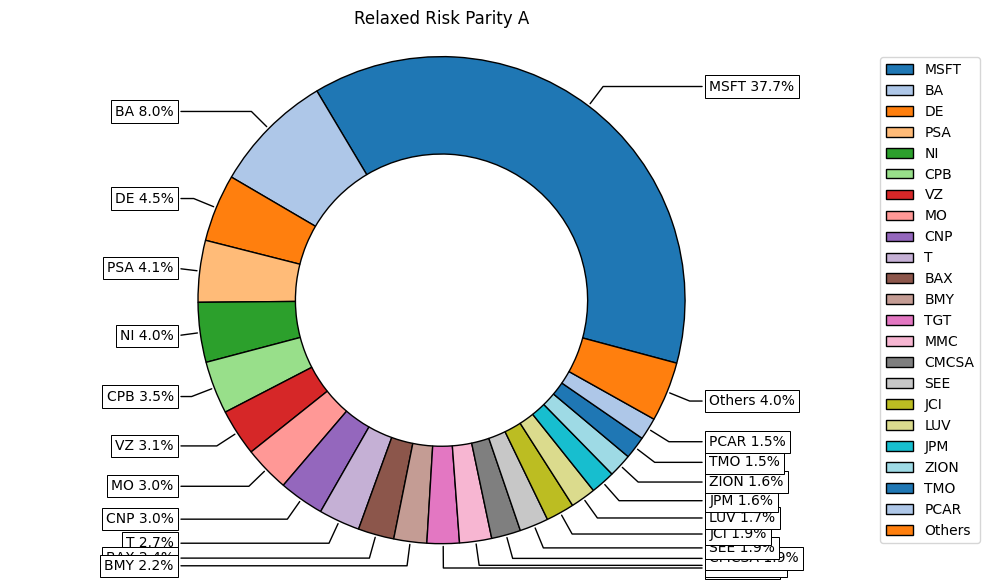

In [7]:
ax = rp.plot_pie(w=w_rrp_a, title='Relaxed Risk Parity A', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.3 Plotting Risk Composition

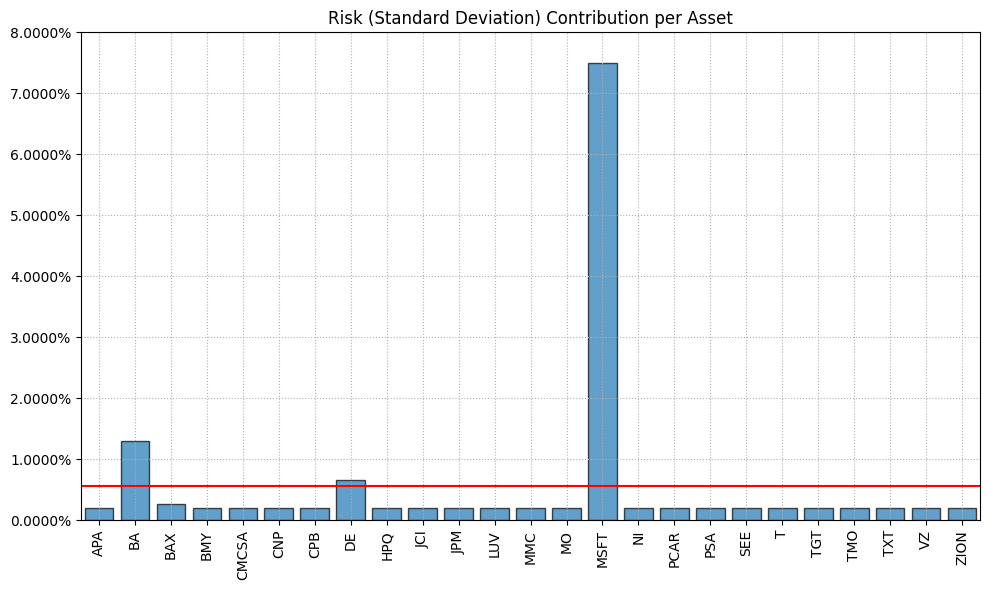

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rrp_a,
                      cov=port.cov,
                      returns=port.returns,
                      rm=rm,
                      rf=0,
                      alpha=0.01,
                      color="tab:blue",
                      erc_line=True,
                      height=6,
                      width=10,
                      ax=ax)

plt.show()

### 3.4 Calculating the relaxed risk parity portfolio version B.

In [9]:
version = 'B' # Could be A, B or C

w_rrp_b = port.rrp_optimization(model=model, version=version, l=l, b=b, hist=hist)

display(w_rrp_b.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,1.1043%,7.6186%,6.7840%,1.9079%,1.7245%,2.6693%,3.1220%,4.6019%,1.1455%,1.6511%,...,3.5769%,1.2926%,3.6420%,1.6897%,2.4182%,3.6117%,1.3182%,1.2516%,2.7383%,1.3483%


### 3.5 Plotting portfolio composition

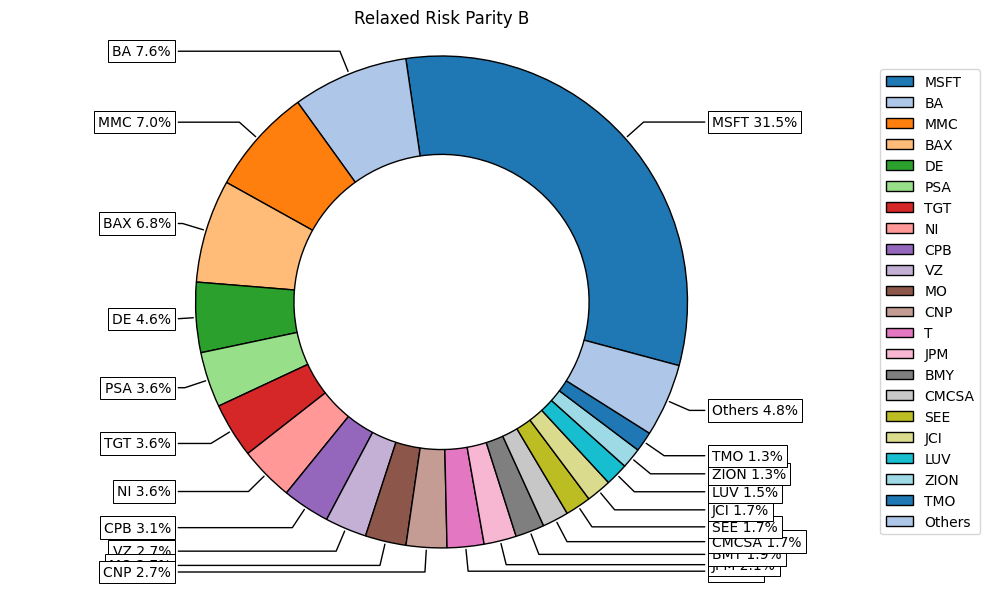

In [10]:
ax = rp.plot_pie(w=w_rrp_b, title='Relaxed Risk Parity B', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.6 Plotting Risk Composition

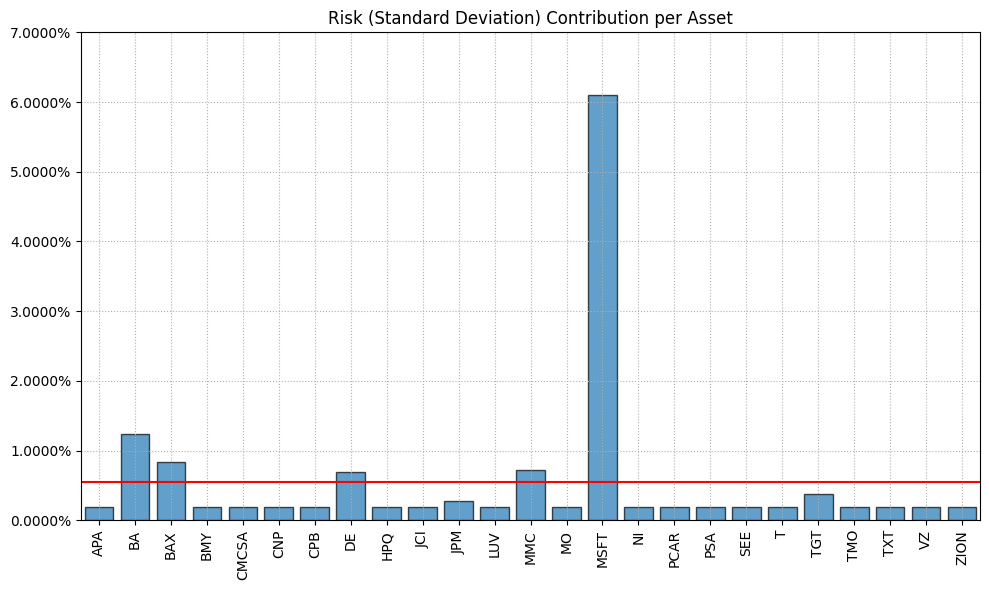

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rrp_b,
                      cov=port.cov,
                      returns=port.returns,
                      rm=rm,
                      rf=0,
                      alpha=0.01,
                      color="tab:blue",
                      erc_line=True,
                      height=6,
                      width=10,
                      ax=ax)

plt.show()

### 3.7 Calculating the relaxed risk parity portfolio version C.

In [12]:
version = 'C' # Could be A, B or C

w_rrp_c = port.rrp_optimization(model=model, version=version, l=l, b=b, hist=hist)

display(w_rrp_c.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.9545%,8.7306%,8.4088%,1.6608%,1.5405%,2.4201%,2.8663%,6.4830%,1.0118%,1.4303%,...,3.3759%,1.1112%,3.4177%,1.4758%,2.1353%,2.9791%,4.8142%,1.0774%,2.4491%,1.1184%


### 3.8 Plotting portfolio composition

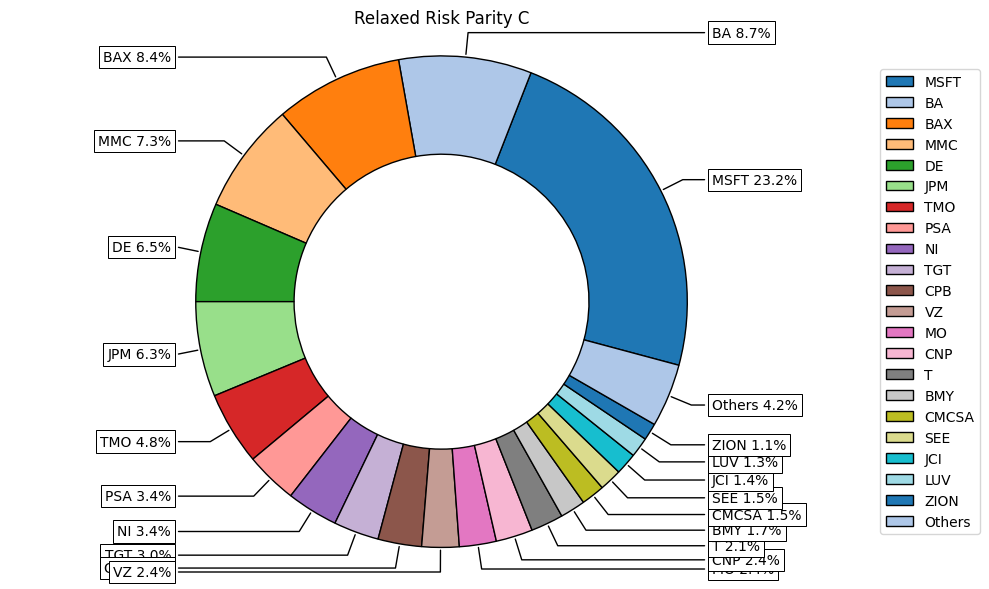

In [13]:
ax = rp.plot_pie(w=w_rrp_c, title='Relaxed Risk Parity C', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

### 3.9 Plotting Risk Composition

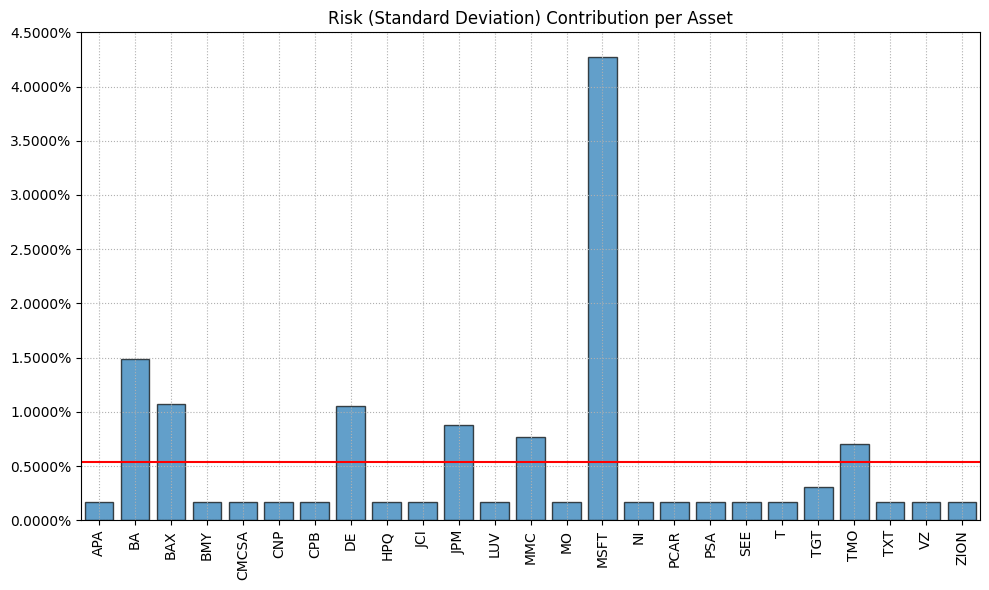

In [14]:
fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rrp_c,
                      cov=port.cov,
                      returns=port.returns,
                      rm=rm,
                      rf=0,
                      alpha=0.01,
                      color="tab:blue",
                      erc_line=True,
                      height=6,
                      width=10,
                      ax=ax)

plt.show()

## 4. Estimating Relaxed Risk Parity Portfolios with Linear Constraints

### 4.1 Building the Linear Constraints

In [16]:
asset_classes = {'Assets': ['JCI','TGT','CMCSA','CPB','MO','APA','MMC','JPM',
                            'ZION','PSA','BAX','BMY','LUV','PCAR','TXT','TMO',
                            'DE','MSFT','HPQ','SEE','VZ','CNP','NI','T','BA'], 
                 'Industry': ['Consumer Discretionary','Consumer Discretionary',
                              'Consumer Discretionary', 'Consumer Staples',
                              'Consumer Staples','Energy','Financials',
                              'Financials','Financials','Financials',
                              'Health Care','Health Care','Industrials','Industrials',
                              'Industrials','Health Care','Industrials',
                              'Information Technology','Information Technology',
                              'Materials','Telecommunications Services','Utilities',
                              'Utilities','Telecommunications Services','Financials']}

asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Assets'])

display(asset_classes)

constraints = {'Disabled': [False, False, False, False, False],
               'Type': ['All Assets', 'Classes', 'Classes', 'Classes',
                        'Classes'],
               'Set': ['', 'Industry', 'Industry', 'Industry', 'Industry'],
               'Position': ['', 'Financials', 'Utilities', 'Industrials',
                            'Consumer Discretionary'],
               'Sign': ['<=', '<=', '<=', '<=', '<='],
               'Weight': [0.10, 0.2, 0.2, 0.2, 0.2],
               'Type Relative': ['', '', '', '', ''],
               'Relative Set': ['', '', '', '', ''],
               'Relative': ['', '', '', '', ''],
               'Factor': ['', '', '', '', '']}

constraints = pd.DataFrame(constraints)

display(constraints)

,Assets,Industry
5,APA,Energy
24,BA,Financials
10,BAX,Health Care
11,BMY,Health Care
2,CMCSA,Consumer Discretionary
21,CNP,Utilities
3,CPB,Consumer Staples
16,DE,Industrials
18,HPQ,Information Technology
0,JCI,Consumer Discretionary


,Disabled,Type,Set,Position,Sign,Weight,Type Relative,Relative Set,Relative,Factor
0,False,All Assets,,,<=,10.0000%,,,,
1,False,Classes,Industry,Financials,<=,20.0000%,,,,
2,False,Classes,Industry,Utilities,<=,20.0000%,,,,
3,False,Classes,Industry,Industrials,<=,20.0000%,,,,
4,False,Classes,Industry,Consumer Discretionary,<=,20.0000%,,,,


### 4.2 Calculating the relaxed risk parity portfolio version C

In [17]:
A, B = rp.assets_constraints(constraints, asset_classes)

port.ainequality = A
port.binequality = B

w_rrp_c = port.rrp_optimization(model=model, version=version, l=l, b=b, hist=hist)

display(w_rrp_c.T)

,APA,BA,BAX,BMY,CMCSA,CNP,CPB,DE,HPQ,JCI,...,NI,PCAR,PSA,SEE,T,TGT,TMO,TXT,VZ,ZION
weights,0.6131%,10.0000%,10.0000%,1.1089%,1.0734%,5.2463%,2.1213%,10.0000%,5.4711%,0.9379%,...,2.4699%,3.6613%,2.5279%,0.9772%,1.4163%,10.0000%,10.0000%,0.6997%,1.6477%,0.7233%


이 코드는 완화된 리스크 균형 포트폴리오 최적화를 수행하면서, 특정 자산 클래스에 대한 제약 조건을 설정하는 방법을 보여줍니다. 여기서는 모델의 C 버전을 사용하여 최적화를 수행하고, 자산 클래스에 대한 부등식 제약 조건을 추가합니다. 각 단계별로 코드를 설명하겠습니다.

### 단계별 코드 설명

1. **자산 제약 조건 생성**:
   ```python
   A, B = rp.assets_constraints(constraints, asset_classes)
   ```

   - `rp.assets_constraints`: 이 함수는 주어진 제약 조건과 자산 클래스를 사용하여 자산 제약 조건 행렬 \( A \)와 벡터 \( B \)를 생성합니다.
   - `constraints`: 각 자산 클래스에 대한 제약 조건을 정의하는 리스트입니다.
   - `asset_classes`: 자산 클래스 목록입니다.

2. **포트폴리오 객체에 제약 조건 설정**:
   ```python
   port.ainequality = A
   port.binequality = B
   ```

   - `port.ainequality`: 부등식 제약 조건 행렬 \( A \)를 포트폴리오 객체에 설정합니다.
   - `port.binequality`: 부등식 제약 조건 벡터 \( B \)를 포트폴리오 객체에 설정합니다.

3. **완화된 리스크 균형 포트폴리오 최적화**:
   ```python
   w_rrp_c = port.rrp_optimization(model=model, version=version, l=l, b=b, hist=hist)
   ```

   - `port.rrp_optimization`: 완화된 리스크 균형 포트폴리오 최적화를 수행하는 메서드입니다.
   - `model`: 사용될 모델을 지정합니다.
   - `version`: 사용될 모델 버전을 지정합니다. 여기서는 'C' 버전을 사용합니다.
   - `l`: 페널티 항으로, C 버전에서만 유효합니다.
   - `b`: 리스크 기여도 제약 조건을 설정하는 벡터입니다. 여기서는 사용하지 않으므로 `None`으로 설정합니다.
   - `hist`: 역사적 데이터를 사용합니다.
   - `w_rrp_c`: 최적화된 포트폴리오 가중치를 저장하는 변수입니다.

4. **결과 출력**:
   ```python
   display(w_rrp_c.T)
   ```

   - `display(w_rrp_c.T)`: 최적화된 포트폴리오 가중치를 전치하여 보기 좋게 출력합니다.

### 요약

1. 자산 제약 조건을 정의하고, 이를 사용하여 제약 조건 행렬 \( A \)와 벡터 \( B \)를 생성합니다.
2. 생성된 제약 조건을 포트폴리오 객체에 설정합니다.
3. 설정된 제약 조건과 모델의 C 버전을 사용하여 완화된 리스크 균형 포트폴리오 최적화를 수행합니다.
4. 최적화된 포트폴리오 가중치를 출력합니다.

### 예제 설명

```python
# 자산 제약 조건 생성
constraints = [...]  # 각 자산 클래스에 대한 제약 조건 리스트
asset_classes = [...]  # 자산 클래스 목록
A, B = rp.assets_constraints(constraints, asset_classes)

# 포트폴리오 객체에 제약 조건 설정
port.ainequality = A
port.binequality = B

# 완화된 리스크 균형 포트폴리오 최적화
w_rrp_c = port.rrp_optimization(model=model, version='C', l=l, b=b, hist=hist)

# 결과 출력
display(w_rrp_c.T)
```

위 코드는 자산 클래스에 대한 제약 조건을 설정한 후, 완화된 리스크 균형 포트폴리오 최적화를 수행하여 최적화된 포트폴리오 가중치를 계산하고 출력하는 방법을 보여줍니다. 이는 투자자가 특정 자산 클래스에 대해 원하는 제한을 두고, 이를 기반으로 포트폴리오를 최적화하는 데 유용합니다.

### 4.3 Plotting portfolio composition

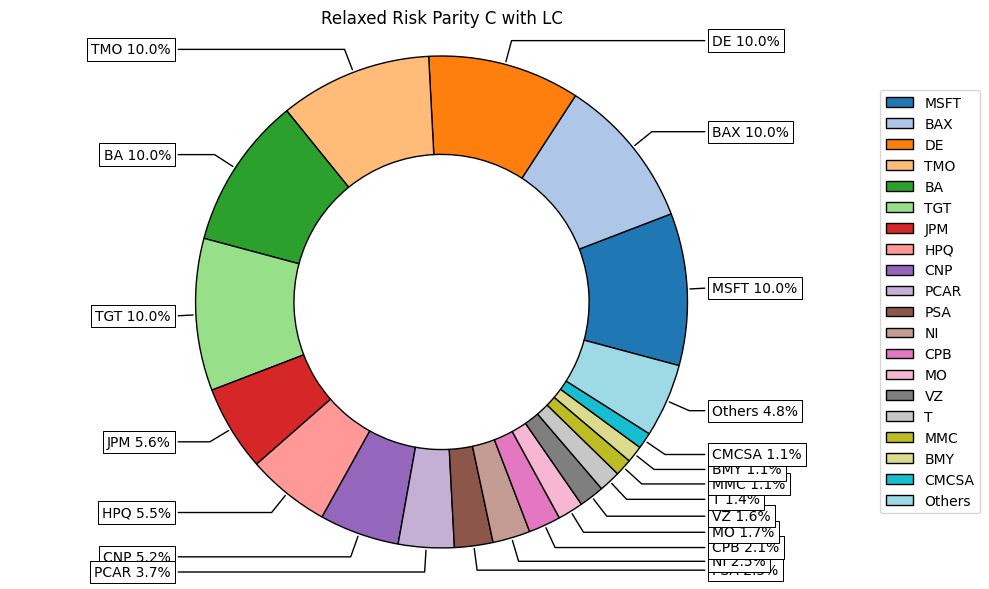

In [18]:
ax = rp.plot_pie(w=w_rrp_c, title='Relaxed Risk Parity C with LC', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

In [19]:
w_classes = pd.concat([asset_classes.set_index('Assets'), w_rrp_c], axis=1)
w_classes = w_classes.groupby(['Industry']).sum()

display(w_classes)

,weights
Industry,
Consumer Discretionary,12.0112%
Consumer Staples,3.7999%
Energy,0.6131%
Financials,20.0000%
Health Care,21.1089%
Industrials,15.2384%
Information Technology,15.4711%
Materials,0.9772%
Telecommunications Services,3.0640%


### 4.4 Plotting Risk Composition

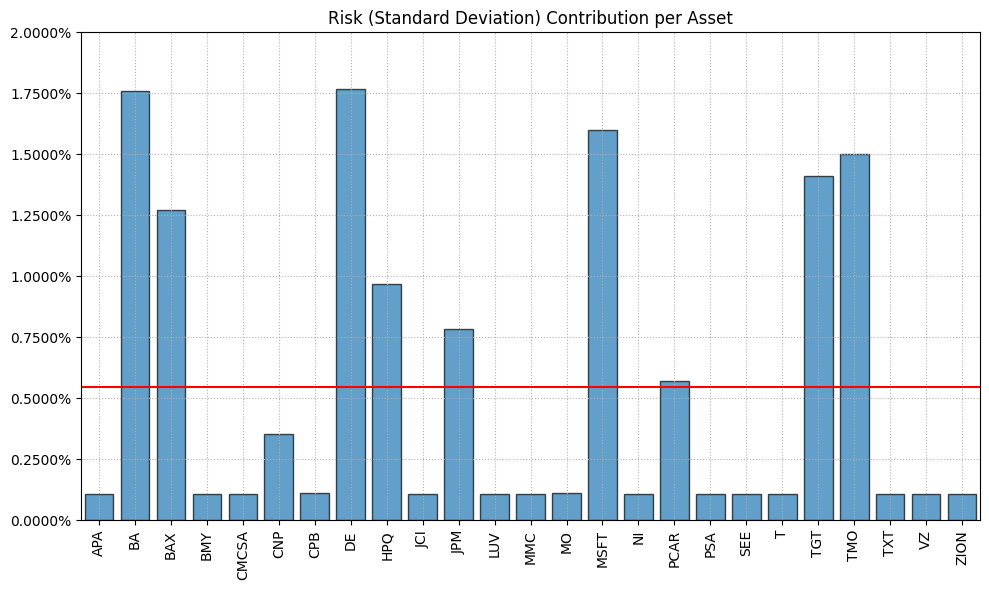

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

# Plotting the risk composition of the portfolio
ax = rp.plot_risk_con(w_rrp_c,
                      cov=port.cov,
                      returns=port.returns,
                      rm=rm,
                      rf=0,
                      alpha=0.01,
                      color="tab:blue",
                      erc_line=True,
                      height=6,
                      width=10,
                      ax=ax)

plt.show()